## Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

## Data Collection and Preprocessing

In [7]:
gold_data = pd.read_csv("gld_price_data.csv")
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [9]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [27]:
type(gold_data)

pandas.core.frame.DataFrame

In [11]:
gold_data.shape

(2290, 6)

In [13]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [15]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

## Data analysis and visualization

In [17]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [29]:
correlation = gold_data[['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']].corr()

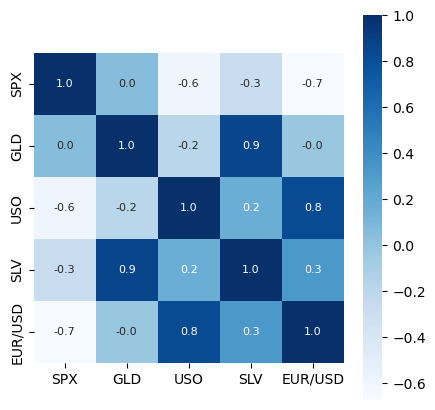

In [40]:
plt.figure(figsize = (5, 5))
sns.heatmap(correlation, square = True, fmt= '.1f', annot = True, cbar = True,  annot_kws = {'size': 8}, cmap = 'Blues')
plt.show()

<Axes: xlabel='GLD', ylabel='Density'>

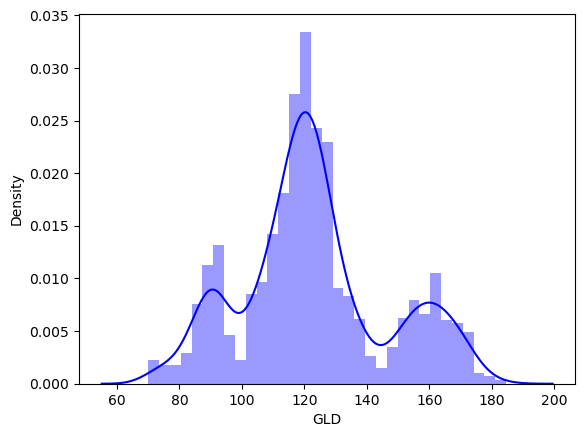

In [90]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='blue')

In [42]:
x = gold_data.drop(['Date', 'GLD'], axis = 1)
y = gold_data['GLD']

In [46]:
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## Splitting Data

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = True, shuffle = True)

In [50]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(2290, 4)
(2061, 4)
(229, 4)


## Train the model

In [62]:
model = RandomForestRegressor(n_estimators = 100)

In [64]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [68]:
x_test_pred = model.predict(x_test)
print(x_test_pred)

[113.66380009 148.11700112 145.44489918 112.49390207 113.74899977
  95.54229939 111.68769951  93.53699967 120.73840056 127.3724003
 147.83420034 120.48139925 119.26030078  88.27200076  96.17490025
  92.8359988  116.27250041  88.91799891 125.51440135 114.89880029
 119.61949913 153.14860154 122.76659807 119.68270025 170.89539985
 108.54659818 120.8158014   87.33829875  87.87910043  88.37589936
 121.43769991 154.51600124 150.6987987  126.3687997  126.33400014
  90.69109925 160.20770034 121.33260179 106.68190075 144.73279686
  92.62929935 127.65670104 117.21100108 152.61700131 119.36999948
  91.20670156  78.18689991 120.20420192 132.07270021 119.11579975
 126.96230037 165.92650036 153.53830096  92.70539945 149.05620015
 152.21409832 113.6944014  112.94810056  86.971499   127.62059937
 125.07030116 152.03400249 114.42199946 110.65649992 161.08579719
 117.19049881 108.4564011  131.71359946 133.50720188 125.28810059
 116.63059965 149.71160211 156.06959974 168.83129558 110.47000045
 141.242497

## Model Evaluation

In [75]:
scr_error = r2_score(y_test , x_test_pred)
print(scr_error)

0.9928917219474233


### Compare the actual values and predicted values in plot

In [80]:
y_test = list(y_test)

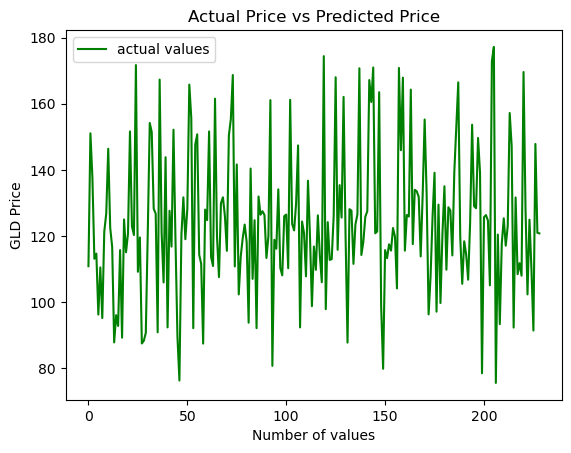

In [84]:
plt.plot(y_test, color='green', label = 'actual values')
#plt.plot(x_test_pred, color='red', label = "predicted values")
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

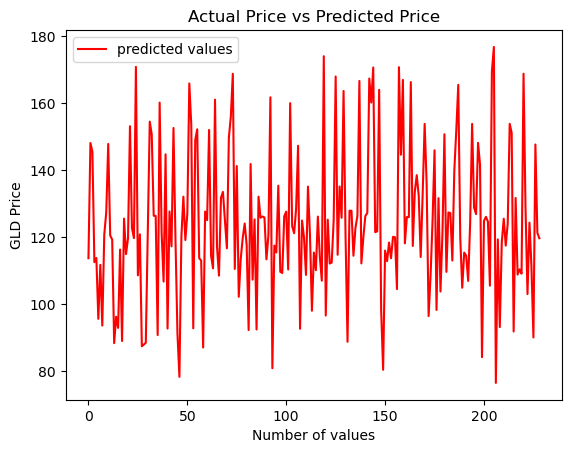

In [86]:
plt.plot(x_test_pred, color='red', label = "predicted values")
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()